In [11]:
import numpy as np
import scipy.linalg as la
import math
import cmath

In [12]:
def hamiltonian (L, J, delta):
    H = np.zeros((2**L,2**L))
    for i in range(2**L):
        basis = [decToBin(k,L) for k in range(2**L)]
        for j in range(L-1):
            s1 = int(basis[i][j])-0.5
            s2 = int(basis[i][(j+1)])-0.5
            H[i,i] = H[i,i] + delta*s1*s2 #diagonal part, H_p
            if (s1 == -0.5 and s2 == 0.5): #s_plus_s_minus
                m = binToDec(basis[i][:j] + '10' + basis[i][(j+2):])
                H[m, i] += 0.5*J
                
            if (s1 == 0.5 and s2 == -0.5): #s_minus_s_plus
                k = binToDec(basis[i][:j] + '01' + basis[i][j+2:])
                H[k, i] += 0.5*J
         
        s1 = int(basis[i][L-1])-0.5
        s2 = int(basis[i][0])-0.5
        H[i,i] = H[i,i] + delta*s1*s2 #diagonal part, H_p
        if (s1 == -0.5 and s2 == 0.5): #s_plus_s_minus
            m = binToDec('0' + basis[i][1:-1] + '1' )
            H[m, i] += 0.5*J
                
        if (s1 == 0.5 and s2 == -0.5): #s_minus_s_plus
            k = binToDec('1' + basis[i][1:-1] + '0')
            H[k, i] += 0.5*J 
          
    return H

def decToBin (dec, L):
    return bin(dec).replace('0b','').zfill(L)

def binToDec (bin):
    return int(bin, 2)

def SiZ (i, L):
    S = np.zeros((2**L,2**L))
    basis = [decToBin(k,L) for k in range(2**L)]
   
    for j in range(2**L):        
       # for l in range(L):
            
        s1 = int(basis[j][i])-0.5
        #    print (j, l, s1)
        S[j,j] = S[j,j] + s1
            
    return S

In [14]:
L = 8
J = 1
delta = 1
T = float("inf")
binSize = 0.1

In [15]:
H = hamiltonian (L, J, delta)
eig = la.eigh(H)
eigEner = eig[0]
eigVect = [eig[1][:, i] for i in range (len(eigEner))]
Z = sum([math.exp(-e/T) for e in eigEner])
oMax = max(eigEner) - min(eigEner)
#print(eigVect[0]-eigVect[1])
binNum = int(oMax / binSize)

In [16]:
S = np.zeros((binNum, L))
for k in range(1,L):  # q=0 omitted for clarity of plot
    SqZ = np.zeros((2**L, 2**L), dtype=complex) 
    q = 2*k*math.pi/L
    for i in range(L):        
        SqZ += cmath.exp(1j*q*i)*SiZ(i, L)
        
    for n in range (2**L):
        for m in range(2**L):
            o = -(int ((eigEner[m] - eigEner[n])/binSize ) - int(binNum/2))%binNum
            
            matrEl = np.dot(np.conj(eigVect[n]), np.dot(SqZ, eigVect[m]))
            temp = math.exp(-eigEner[n]/T)/Z * abs(matrEl)**2 / binSize
            S[o][k] += temp 
#np.set_printoptions(precision=3, suppress=True)
#print(S)

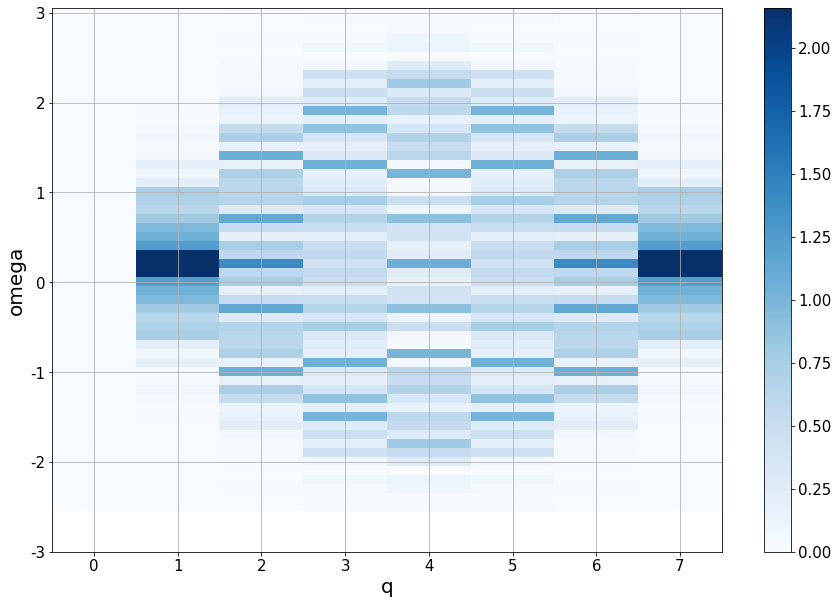

In [17]:
import matplotlib.pyplot as plt
from matplotlib import cm # This allows different color schemes

plt.rcParams["figure.figsize"]=15,10
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelsize']=20
plt.rcParams['figure.titlesize']=30
fig = plt.imshow(S,interpolation='none', cmap=cm.Blues, aspect='auto')

#plt.xticks(range(0,10), labels=range(1,11))
plt.yticks(range(0,62,10), labels=[3, 2, 1, 0, -1, -2, -3])
plt.grid(None)
#plt.xlim(0, 9)
#plt.colorbar(ticks=[-0.5, -0.25, 0, 0.25, 0.5])
plt.colorbar()
plt.xlabel('q')
plt.ylabel('omega')
#plt.title(r'L = 10, $\Delta$ = 1')

plt.show()

In [18]:
# T = 0
S = np.zeros((binNum, L))
for k in range(1, L):
    SqZ = np.zeros((2**L, 2**L), dtype = complex) 
    q = 2*k*math.pi/L
    for i in range(L):
        SqZ += cmath.exp(1j*q*i)*SiZ(i, L)
    for n in range (2**L):
        o = -(int ((eigEner[n] - eigEner[0])/binSize - binSize/2)  - int(binNum/2))%binNum
            
        matrEl = np.dot(eigVect[0], np.dot(SqZ, eigVect[n]))
        temp =  abs(matrEl)**2 /binSize
           # if (temp > 0): 
             #   print (o, k, temp)
        S[o][k] += temp
np.set_printoptions(precision=3, suppress=True)
#print(S)

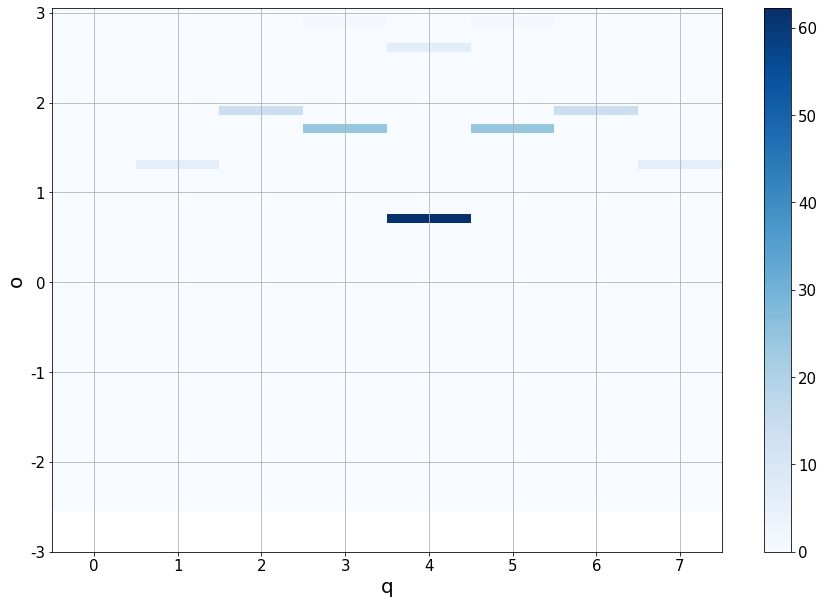

In [19]:
import matplotlib.pyplot as plt
from matplotlib import cm # This allows different color schemes

plt.rcParams["figure.figsize"]=15,10
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelsize']=20
plt.rcParams['figure.titlesize']=30
fig = plt.imshow(S,interpolation='none', cmap=cm.Blues, aspect='auto')

#plt.xticks(range(0,10), labels=range(1,11))
plt.yticks(range(0,62,10), labels=[3, 2, 1, 0, -1, -2, -3])
plt.grid(None)
#plt.colorbar(ticks=[-0.5, -0.25, 0, 0.25, 0.5])
plt.colorbar()
plt.xlabel('q')
plt.ylabel('o')
#plt.title(r'L = 10, $\Delta$ = 1')

plt.show()